<a href="https://colab.research.google.com/github/IrfhanAhmedh/Machine-Learning-Oil-and-Gas-/blob/main/Poisson_Distribution_Prediction_of_football_outcome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('football_data.csv')

In [14]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41635,2020-09-08,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False
41636,2020-09-08,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False
41637,2020-09-08,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False
41638,2020-09-08,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False


In [15]:
df['date']=df['date'].apply(lambda x : int(str.split(x,'-')[0]))


In [19]:
df=df[df['date']>=2000]
df['Totalgoalscored']=df['home_score']+df['away_score']
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Totalgoalscored
22448,2000,Egypt,Togo,2,1,Friendly,Aswan,Egypt,False,3
22449,2000,Tunisia,Togo,7,0,Friendly,Tunis,Tunisia,False,7
22450,2000,Trinidad and Tobago,Canada,0,0,Friendly,Port of Spain,Trinidad and Tobago,False,0
22451,2000,Burkina Faso,Gabon,1,1,Friendly,Ouagadougou,Burkina Faso,False,2
22452,2000,Guatemala,Armenia,1,1,Friendly,Los Angeles,United States,True,2
...,...,...,...,...,...,...,...,...,...,...
41635,2020,Luxembourg,Montenegro,0,1,UEFA Nations League,Luxembourg City,Luxembourg,False,1
41636,2020,Cyprus,Azerbaijan,0,1,UEFA Nations League,Nicosia,Cyprus,False,1
41637,2020,Armenia,Estonia,2,0,UEFA Nations League,Yerevan,Armenia,False,2
41638,2020,Georgia,North Macedonia,1,1,UEFA Nations League,Tbilisi,Georgia,False,2


In [41]:
highest_goal_scored=df['Totalgoalscored'].nlargest(1)

In [28]:
mean_goals_scored=df['Totalgoalscored'].mean()

In [29]:
mean_goals_scored

2.744112130054189

In [2]:
def factorial(x):
 x_fact=1
 for i in range(0,x):
   x_fact=(x-i)*x_fact
 return x_fact

In [3]:
def poison(x,mean):
  prob=(mean**x)/(factorial(x)*np.exp(mean))
  return prob

chances of a match where total scored is Exactly 1 goal

In [33]:
x=1
probability=poison(x,mean_goals_scored)
probability*100

17.646114697345254

chances of a match where total scored is Exactly 5 goal

In [34]:
x=5
probability=poison(x,mean_goals_scored)
probability*100

8.338256793082442

chances of a match where total scored is less than 5 goal

In [50]:
x=5
probability=0
for i in range(0,x):
 probability=poison(i,mean_goals_scored)+probability
probability*100

85.62742535968549

**Plotting Number of Goal Score vs Probability (Upto 7 goals)**

In [97]:
number_of_goal_score=np.arange(7)*0
probability=np.arange(7)*0
probability=probability.astype(float)
for i in range (7):
 number_of_goal_score[i]=i
 probability[i]=poison(i,mean_goals_scored)*100


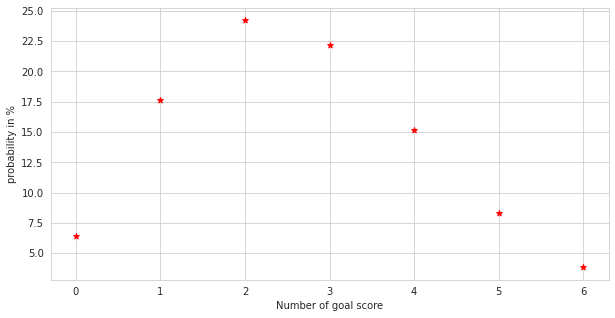

In [116]:
plt.figure(figsize=[10,5])
sns.set_style('whitegrid')
plt.scatter(number_of_goal_score,probability,marker='*',c='r')
plt.xlabel('Number of goal score')
plt.ylabel('probability in %')
plt.show()